**Thermal Waves - Fourier Transform**

January 11, 2022

In this Python tutorial we show how to compute the Fourier transform of a set of discrete data using 'fft()'. FFT stands for Fast Fourier Transform.  We will demonstrate the use of 'fft()' using example data from the thermal waves experiment (after converting from resistance to temperature are subtracting a moving average).

First, import some common modules.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

We will use the 'ftt()' function from the SciPy module to evaluate our Fourier transform.  Import the module.

In [2]:
from scipy.fft import fft

To deomstrate the use of 'fft()', we'll import some data from the PHYS 232 thermal waves experiment and apply the fft routine.  The data file that we'll work with is called "Corrected thermal waves T vs t data.txt".
 
Import data.

In [3]:
PHYS232 = np.loadtxt('Corrected thermal waves T vs t data.txt')
time = PHYS232[:, 0]
amplitude = PHYS232[:, 1]

Plot the imported data.

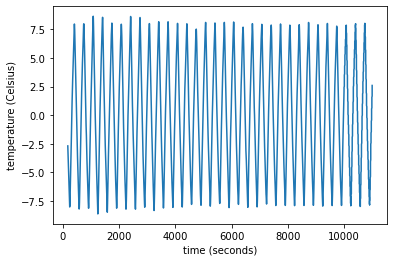

In [4]:
plt.plot(time,amplitude)
plt.xlabel('time (seconds)')
plt.ylabel('temperature (Celsius)');

Compute the discrete Fourier Transform of the amplitude data using 'fft()'.  

The fft function outputs a vector of complex numbers.  If we're just interested in the magnitude of the fft (as is the case in the thermal waves experiment), we can then calculate the absolute value of the output.

In [5]:
y = fft(amplitude)
m = abs(y)

We have to determine the appropriate frequency scale for the x-axis.  

The maximum frequency is set by the spacing between adjacent times.  

The frequency step, is set by fmax/(number of points - 1).

In [6]:
fmax = 1/(time[1]-time[0])
fstep = fmax/len(time)
fmax, fstep

(1.0, 9.229349330872173e-05)

Therefore the frequency axis is:

In [7]:
freq = np.arange(0, fmax, fstep)

Below, we plot the magnitude of the fourier transform.  

I don't know enough about fft to know why, but the magnitude that is output is the amplitude of the time signal multiplied by one half the number of points.  To get just the amplitude, I will divided the magnitude by N/2 before plotting.

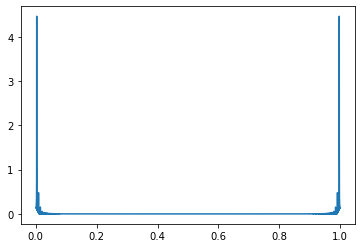

In [9]:
plt.plot(freq, m/(len(time)/2));

Here's a zoomed-in view of the fft magnitude.  

The fundamental frequency of this data is 0.003 Hz with peaks at the odd harmonics (0.009 and 0.015 Hz).

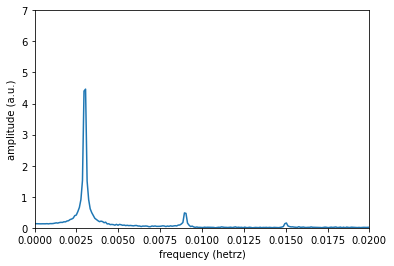

In [10]:
plt.plot(freq, m/(len(time)/2))
plt.axis((0, 0.02, 0, 7))
plt.xlabel('frequency (hetrz)')
plt.ylabel('amplitude (a.u.)');